# Fundamentals of Linear and Logistic Regression

## Objective
Implement and evaluate linear models for regression and classification using scikit-learn.

This notebook covers:
- Linear Regression: Predicting continuous values
- Logistic Regression: Binary classification
- Model evaluation metrics
- Hands-on implementation with scikit-learn

## Prerequisites
- Basic Python knowledge
- Familiarity with pandas and numpy
- Understanding of basic statistics (mean, variance, etc.)

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_regression, make_classification

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


## Part 1: Linear Regression

### Theory
Linear regression is a supervised learning algorithm used for predicting continuous values. It assumes a linear relationship between the input features (X) and the target variable (y).

The simple linear regression equation is:
```
y = mx + b
```

Where:
- y is the predicted value
- x is the input feature
- m is the slope (coefficient)
- b is the intercept

For multiple features, it becomes:
```
y = b + m1*x1 + m2*x2 + ... + mn*xn
```

### Implementation: Simple Linear Regression

Let's start with a simple example using synthetic data.

In [2]:
# Generate synthetic data for regression
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (80, 1)
Test data shape: (20, 1)


In [3]:
# Create and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("Model trained!")
print(f"Coefficient: {lr_model.coef_[0]:.2f}")
print(f"Intercept: {lr_model.intercept_:.2f}")

Model trained!
Coefficient: 44.24
Intercept: 0.10


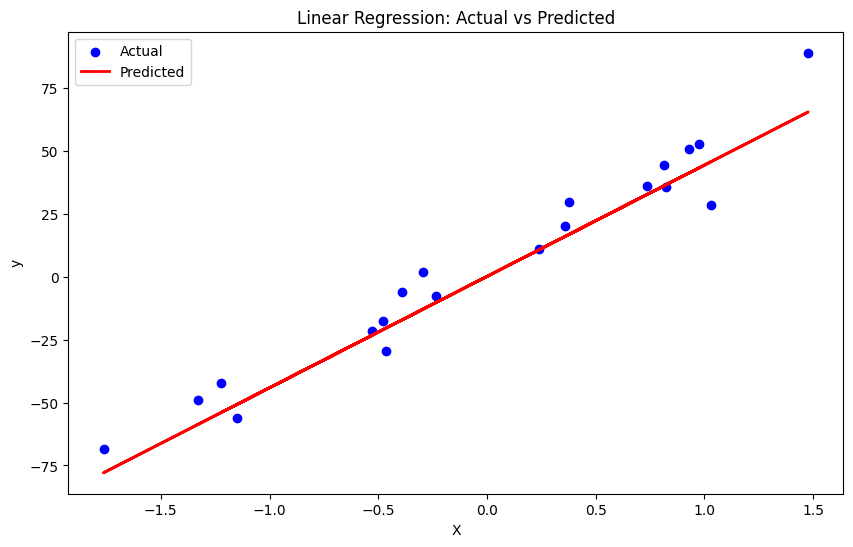

In [4]:
# Make predictions
y_pred = lr_model.predict(X_test)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

### Evaluation Metrics for Regression

Common metrics to evaluate regression models:
- **Mean Squared Error (MSE)**: Average of squared differences between predicted and actual values
- **Root Mean Squared Error (RMSE)**: Square root of MSE
- **R² Score**: Proportion of variance in the dependent variable explained by the model (0 to 1)

Lower MSE/RMSE is better. Higher R² is better.

In [5]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 104.20
Root Mean Squared Error: 10.21
R² Score: 0.94


### Try It Yourself 1: Multiple Linear Regression

Now let's try with multiple features. Modify the code below to:
1. Generate data with 3 features instead of 1
2. Train a linear regression model
3. Evaluate its performance
4. Print the coefficients for each feature

In [6]:
# Try it yourself: Multiple Linear Regression
# Generate data with 3 features
X_multi, y_multi = make_regression(n_samples=100, n_features=3, noise=10, random_state=42)

# Split the data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Create and train the model
# YOUR CODE HERE

# Make predictions
# YOUR CODE HERE

# Evaluate
# YOUR CODE HERE

# Print coefficients
# YOUR CODE HERE

## Part 2: Logistic Regression

### Theory
Logistic regression is used for binary classification problems. Despite its name, it's a classification algorithm that predicts the probability of an event occurring.

The logistic function (sigmoid) is:
```
σ(z) = 1 / (1 + e^(-z))
```

Where z = b + m1*x1 + m2*x2 + ... + mn*xn

The output is a probability between 0 and 1. We use a threshold (usually 0.5) to classify:
- If probability ≥ 0.5, predict class 1
- If probability < 0.5, predict class 0

### Implementation: Binary Classification

Let's implement logistic regression for a binary classification problem.

In [7]:
# Generate synthetic data for classification
X_clf, y_clf = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, random_state=42)

# Split the data
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train_clf.shape}")
print(f"Test data shape: {X_test_clf.shape}")
print(f"Classes: {np.unique(y_clf)}")

Training data shape: (80, 2)
Test data shape: (20, 2)
Classes: [0 1]


In [8]:
# Create and train the logistic regression model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_clf, y_train_clf)

print("Model trained!")
print(f"Coefficients: {log_model.coef_[0]}")
print(f"Intercept: {log_model.intercept_[0]:.2f}")

Model trained!
Coefficients: [ 3.06127461 -0.68478105]
Intercept: 0.23


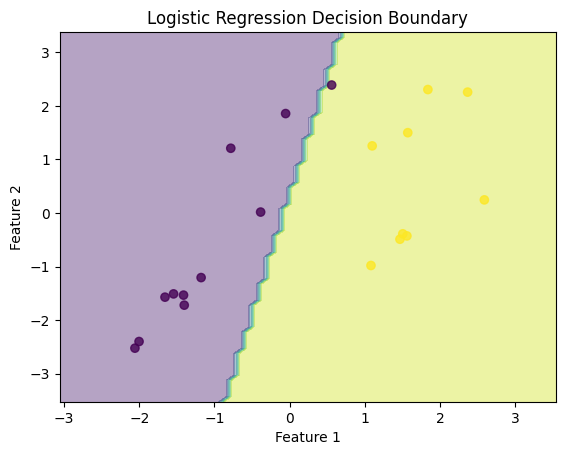

In [9]:
# Make predictions
y_pred_clf = log_model.predict(X_test_clf)
y_pred_proba = log_model.predict_proba(X_test_clf)[:, 1]  # Probability of class 1

# Visualize the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary')
    plt.show()

plot_decision_boundary(X_test_clf, y_test_clf, log_model)

### Evaluation Metrics for Classification

Common metrics for classification:
- **Accuracy**: Proportion of correct predictions
- **Precision**: True Positives / (True Positives + False Positives)
- **Recall**: True Positives / (True Positives + False Negatives)
- **F1-Score**: Harmonic mean of precision and recall
- **Confusion Matrix**: Table showing true vs predicted classifications

Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20


Confusion Matrix:
[[10  1]
 [ 0  9]]


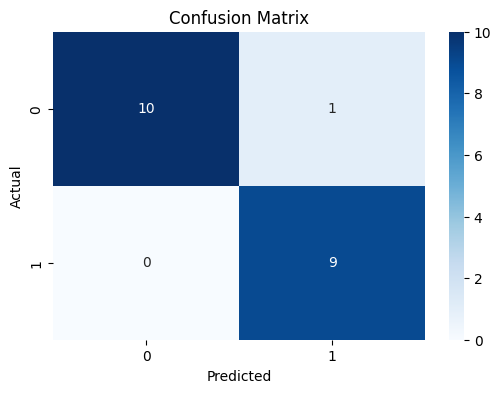

In [10]:
# Evaluate the classification model
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_clf, y_pred_clf))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_clf, y_pred_clf)
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Try It Yourself 2: Multi-class Classification

Logistic regression can also handle multi-class problems using one-vs-rest approach. Modify the code below to:
1. Generate data with 3 classes instead of 2
2. Train a logistic regression model
3. Evaluate its performance
4. Display the confusion matrix

Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00        13

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix:
[[ 7  1  0]
 [ 0  9  0]
 [ 0  0 13]]


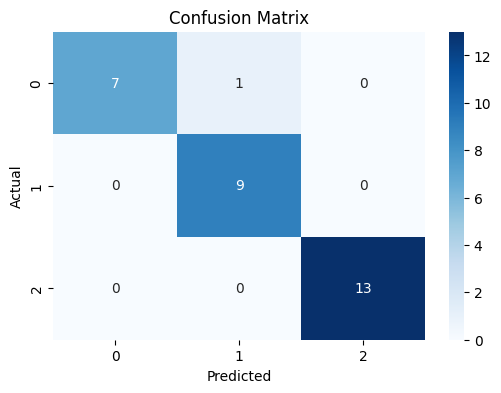

In [ ]:
# Try it yourself: Multi-class Classification
# Generate data with 3 classes
X_multi_clf, y_multi_clf = make_classification(n_samples=150, n_features=2, n_classes=3, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the data
X_train_multi_clf, X_test_multi_clf, y_train_multi_clf, y_test_multi_clf = train_test_split(X_multi_clf, y_multi_clf, test_size=0.2, random_state=42)

# Create and train the model
# YOUR CODE HERE
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_multi_clf, y_train_multi_clf)

# Make predictions
y_pred_clf = log_model.predict(X_test_multi_clf)
y_pred_proba = log_model.predict_proba(X_test_multi_clf)[:, 1]  # Probability of class 1

# Evaluate the classification model
accuracy = accuracy_score(y_test_multi_clf, y_pred_clf)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_multi_clf, y_pred_clf))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_multi_clf, y_pred_clf)
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()






## Summary

In this notebook, we covered:

1. **Linear Regression**:
   - Theory and assumptions
   - Implementation with scikit-learn
   - Evaluation using MSE, RMSE, and R²

2. **Logistic Regression**:
   - Theory and sigmoid function
   - Binary classification implementation
   - Evaluation using accuracy, precision, recall, F1-score, and confusion matrix

3. **Hands-on Practice**:
   - Multiple linear regression
   - Multi-class classification

### Key Takeaways:
- Linear models are interpretable and fast to train
- Always split your data into training and testing sets
- Choose appropriate evaluation metrics for your problem type
- Visualize your results to understand model performance

### Next Steps:
- Try these models on real datasets
- Explore regularization techniques (Ridge, Lasso)
- Learn about more advanced algorithms